In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data

In [31]:
#download MSFT price data into DataFrame
MSFT = data.DataReader('MSFT', 'yahoo',start='1/1/2020')

#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (MSFT.index[-1] - MSFT.index[0]).days
cagr = ((((MSFT['Adj Close'][-1]) / MSFT['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#create a series of percentage returns and calculate 
#the annual volatility of returns
MSFT['Returns'] = MSFT['Adj Close'].pct_change()
vol = MSFT['Returns'].std()*np.sqrt(252) # #Number of trading days
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 41.589999999999996%
Annual Volatility = 38.76%


In [32]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2021-06-07,254.089996,249.809998,249.979996,253.809998,23079200.0,253.809998,0.012042
2021-06-08,256.010010,252.509995,255.160004,252.570007,22455000.0,252.570007,-0.004886
2021-06-09,255.529999,253.210007,253.809998,253.589996,17937600.0,253.589996,0.004038
2021-06-10,257.459991,253.669998,254.289993,257.239990,24563600.0,257.239990,0.014393
2021-06-11,258.489990,256.609985,257.989990,257.890015,18995100.0,257.890015,0.002527


### code basically ran a single simulation of potential price series evolution over a trading year (252 days), based upon a draw of random daily returns that follow a normal distribution. This is represented by the single line series shown in the first chart. The second chart plots a histogram of those random daily returns over the year period.

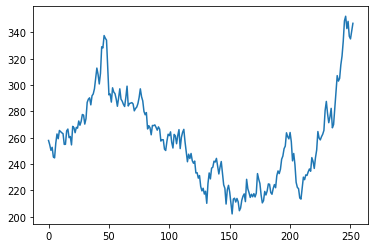

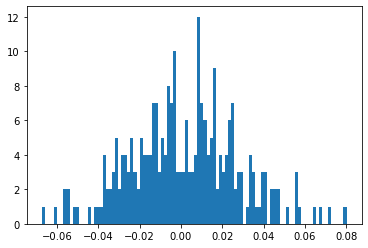

In [33]:
S = MSFT['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
 
#set starting price and create price series generated by above random daily returns
price_list = [S]
for x in daily_returns:
    price_list.append(price_list[-1]*x)
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

In [34]:
price_list[0:10]

[257.8900146484375,
 254.5917319246012,
 250.42761510381357,
 252.7024140090927,
 245.31570788792524,
 244.66176923067013,
 255.90735411338503,
 262.8598110508736,
 259.23297777455895,
 265.50759842530294]

In [35]:
MSFT=MSFT.reset_index()
MSFT.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Returns
0,2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,158.205765,NaN
1,2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,156.235825,-0.012452
2,2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,156.639694,0.002585
3,2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,155.211456,-0.009118
4,2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,157.683731,0.015928


In [36]:
# Split the dataframe 
split_date ='2020-02-01'
X_precovid = MSFT.loc[MSFT['Date'] <= split_date]
X_covid = MSFT.loc[MSFT['Date'] > split_date]
X_covid

,Date,High,Low,Open,Close,Volume,Adj Close,Returns
21,2020-02-03,174.500000,170.399994,170.429993,174.380005,30107000.0,171.758942,0.024379
22,2020-02-04,180.639999,176.309998,177.139999,180.119995,36433300.0,177.412659,0.032917
23,2020-02-05,184.199997,178.410004,184.029999,179.899994,39186300.0,177.195969,-0.001221
24,2020-02-06,183.820007,180.059998,180.970001,183.630005,27751400.0,180.869888,0.020734
25,2020-02-07,185.630005,182.479996,182.850006,183.889999,33529100.0,181.126007,0.001416
...,...,...,...,...,...,...,...,...
359,2021-06-07,254.089996,249.809998,249.979996,253.809998,23079200.0,253.809998,0.012042
360,2021-06-08,256.010010,252.509995,255.160004,252.570007,22455000.0,252.570007,-0.004886
361,2021-06-09,255.529999,253.210007,253.809998,253.589996,17937600.0,253.589996,0.004038
362,2021-06-10,257.459991,253.669998,254.289993,257.239990,24563600.0,257.239990,0.014393


In [43]:
local_path = './data/MSFT_prepared.csv'
local_path_covid = './data/MSFT_covid.csv'
# Save the two dataset to csv
X_precovid.to_csv(local_path)
X_covid.to_csv(local_path_covid)
# upload the local file to a datastore on the cloud

# get the datastore to upload prepared data
datastore = ws.get_default_datastore()

NameError: name 'ws' is not defined